In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 0.25,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.01428467,  0.1694836 ,  0.34420919,  0.53124654,  0.70942104,
        0.85001886,  0.93688023,  0.9759289 ,  0.98244596,  0.96899819,
        0.94356585,  0.91098893,  0.87422454,  0.83510983,  0.79480034,
        0.75402451,  0.71323466,  0.67269951,  0.63256192,  0.59287524,
        0.55362636,  0.51474988,  0.47613645,  0.43763581,  0.3990576 ,
        0.3601687 ,  0.32068911,  0.28028649,  0.23857057,  0.19508937,
        0.14932959,  0.10072708,  0.04869321, -0.00733167, -0.0677864 ,
       -0.13284847, -0.20224753, -0.27506354, -0.34958073, -0.42330757,
       -0.49325356, -0.5564512 , -0.61055481, -0.6542697 , -0.68744743,
       -0.71087635, -0.7259171 , -0.73415101, -0.73712337, -0.7362026 ,
       -0.73252356, -0.72698724, -0.72028589, -0.71293759, -0.70532167,
       -0.69771028, -0.69029391, -0.68320155, -0.67651618, -0.67028749,
       -0.66454089, -0.65928364, -0.65451038, -0.65020728, -0.64635348,
       -0.6429249 , -0.63989437, -0.6372335 , -0.63491356, -0.63

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.20177066e-01],
       [  2.00000000e+01,   4.96789336e-01],
       [  3.00000000e+01,   5.09636819e-01],
       [  4.00000000e+01,   5.04956186e-01],
       [  5.00000000e+01,   3.75555962e-01],
       [  6.00000000e+01,   2.91257203e-01],
       [  7.00000000e+01,   2.13277772e-01],
       [  8.00000000e+01,   1.17498398e-01],
       [  9.00000000e+01,   9.31859761e-02],
       [  1.00000000e+02,   7.08935857e-02],
       [  1.10000000e+02,   5.98928742e-02],
       [  1.20000000e+02,   4.47566994e-02],
       [  1.30000000e+02,   4.23476994e-02],
       [  1.40000000e+02,   4.06428352e-02],
       [  1.50000000e+02,   3.76752391e-02],
       [  1.60000000e+02,   3.00771110e-02],
       [  1.70000000e+02,   2.94041205e-02],
       [  1.80000000e+02,   2.66896002e-02],
       [  1.90000000e+02,   2.51652580e-02],
       [  2.00000000e+02,   2.67209820e-02],
       [  2.10000000e+02,   1.86185986e-02],
       [  2.20000000e+02,   2.18948480e-02],
       [  

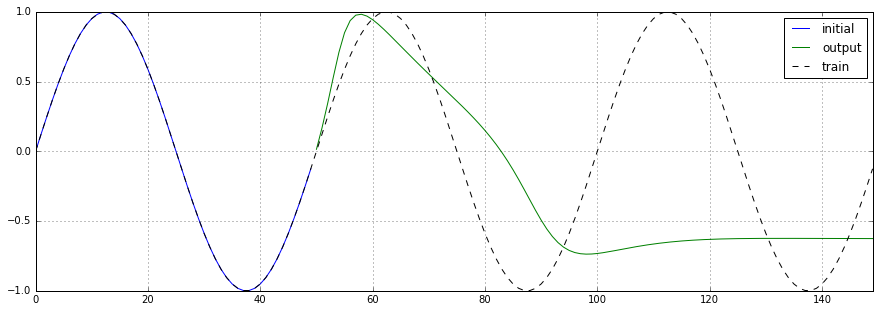

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

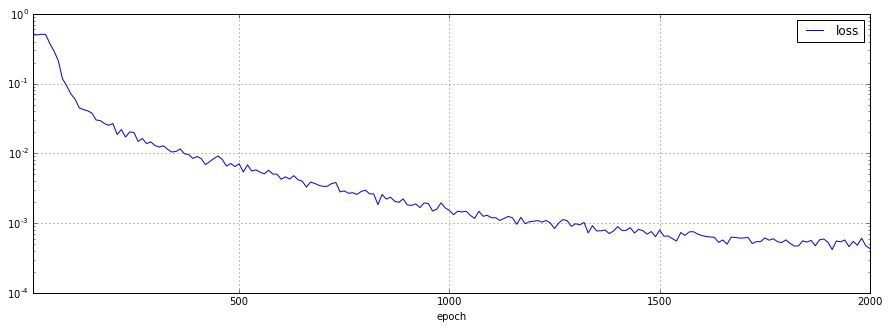

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")